In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import AutoTokenizer
from transformers import pipeline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch

# Cargar embeddings y moverlos a la CPU antes de convertir a numpy
embeddings_specials_removed = torch.load("/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/embeddings_specials_removed.pt").cpu().numpy()
embeddings_keep_specials = torch.load("/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/embeddings_keep_specials.pt").cpu().numpy()


<ipython-input-3-71ae5866e8e4>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings_specials_removed = torch.load("/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva

In [4]:
from sklearn.cluster import KMeans

# Número de clusters (puedes ajustar según el contexto)
n_clusters = 5

# Clustering en embeddings (sin caracteres especiales)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_specials_removed = kmeans.fit_predict(embeddings_specials_removed)

# Clustering en embeddings (con caracteres especiales)
labels_keep_specials = kmeans.fit_predict(embeddings_keep_specials)


In [5]:
import pandas as pd

# Cargar el dataset original
data = pd.read_csv("/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/processed_data.csv")

# Añadir las etiquetas de los clusters al dataset
data['cluster_specials_removed'] = labels_specials_removed
data['cluster_keep_specials'] = labels_keep_specials

# Análisis de distribución por categoría
distribution = data.groupby(['generated', 'cluster_specials_removed']).size().unstack(fill_value=0)
print(distribution)


cluster_specials_removed     0     1     2    3    4
generated                                           
0                         1230   260  1391   28   91
1                          761  1030     0  530  679


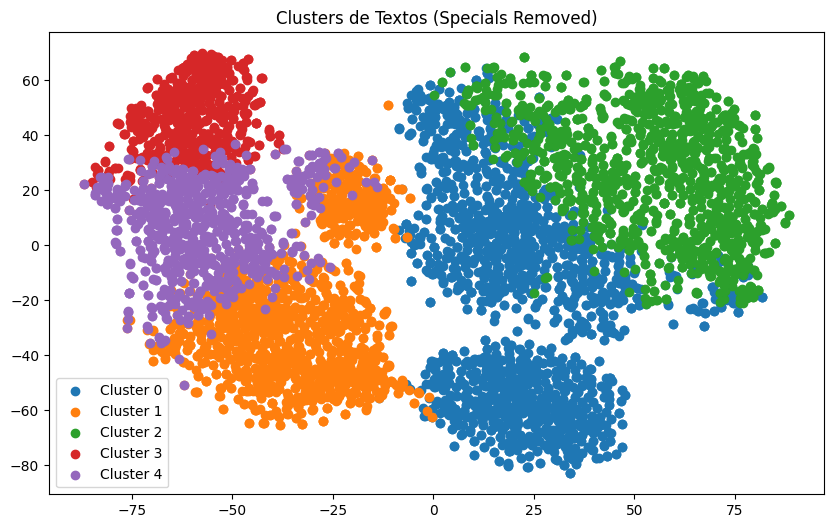

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reducir dimensionalidad para visualización
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings_specials_removed)

# Graficar clusters
plt.figure(figsize=(10, 6))
for label in set(labels_specials_removed):
    indices = labels_specials_removed == label
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=f'Cluster {label}')
plt.legend()
plt.title("Clusters de Textos (Specials Removed)")
plt.show()


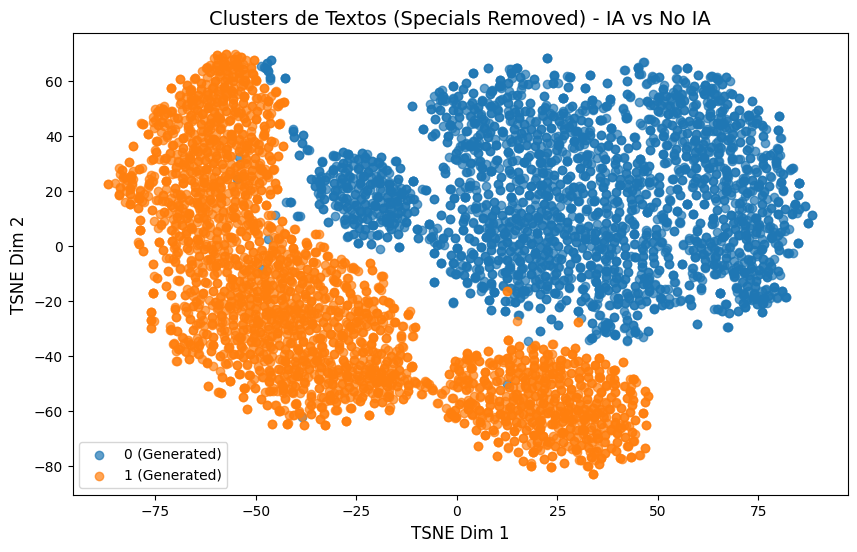

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir dimensionalidad para visualización
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings_specials_removed)

# Añadir información de clusters y categoría al DataFrame
data['cluster_specials_removed'] = labels_specials_removed  # Etiquetas de clusters
data['x'] = reduced_embeddings[:, 0]  # Coordenada X del gráfico
data['y'] = reduced_embeddings[:, 1]  # Coordenada Y del gráfico

# Crear el gráfico diferenciando IA y No IA
plt.figure(figsize=(10, 6))
for label in set(data['generated']):
    subset = data[data['generated'] == label]
    plt.scatter(subset['x'], subset['y'], label=f'{label} (Generated)', alpha=0.7)

plt.title("Clusters de Textos (Specials Removed) - IA vs No IA", fontsize=14)
plt.xlabel("TSNE Dim 1", fontsize=12)
plt.ylabel("TSNE Dim 2", fontsize=12)
plt.legend()
plt.show()
